## DISCIPLINA INTELIGÊNCIA ARTIFICIAL
### **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Exemplo: Algoritmo K-Means para agrupar clientes de um shopping. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [4]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [6]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [7]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True) 

In [8]:
df.head(3)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [9]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [10]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [11]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **PRÉ-PROCESSAMENTO**

In [12]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [13]:
df2 = df.drop(['identificacao'], axis = 1)

In [14]:
df2.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


###**Transformar variáveis categóricas em numéricas**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df2['genero'] = le.fit_transform(df2['genero'])

In [17]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


###**Escalonamento**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)
# df2_esc = df2.values

In [56]:
df2.columns

Index(['genero', 'idade', 'rendimento', 'pontuacao'], dtype='object')

In [20]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## **K-MEANS COM TODOS ATRIBUTOS**

**Soma dos Erros Quadrados**

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
wcss

[800.0000000000001,
 588.8026767824938,
 476.86006878694354,
 386.8284255837665,
 332.1157380294935,
 274.7776744078967,
 236.6928787710081,
 199.75046112065576,
 174.2029989274245,
 152.02983429775685,
 137.1981688818106,
 125.3670786287708,
 114.30556865567468,
 106.58431520261988]

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

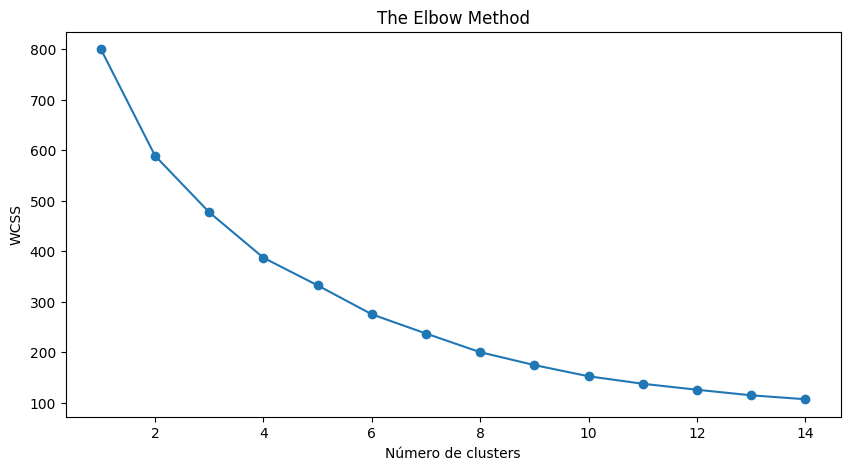

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

**Agrupamento**

In [37]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5, max_iter = 300)


In [38]:
kmeans = kmeans.fit(df2_esc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# Coordenadas dos Centróides
centroides = kmeans.cluster_centers_
centroides

array([[-0.88640526,  0.70849671, -0.00229017, -0.56133101],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.07050951, -0.44315931,  1.03973525,  1.17726383],
       [ 1.12815215, -0.99149394, -0.58075445,  0.06854013],
       [ 1.12815215,  1.06214701,  0.03206232, -0.72984534]])

In [40]:
# Classificação dos dados
classificacao = kmeans.labels_
classificacao

array([3, 3, 1, 1, 1, 1, 0, 1, 4, 1, 4, 1, 0, 1, 3, 3, 1, 3, 4, 1, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 4, 1, 4, 3, 0, 1, 0, 1, 0, 1, 0, 3, 4, 1,
       0, 1, 0, 1, 1, 1, 0, 3, 1, 4, 0, 4, 0, 4, 1, 4, 4, 3, 0, 0, 4, 3,
       0, 0, 3, 1, 4, 0, 0, 0, 4, 3, 0, 3, 1, 0, 4, 3, 4, 0, 1, 4, 0, 1,
       1, 0, 0, 3, 4, 0, 1, 3, 0, 1, 4, 3, 1, 0, 4, 3, 4, 1, 0, 4, 4, 4,
       4, 1, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       1, 2, 3, 2, 0, 2, 3, 2, 0, 2, 1, 2, 3, 2, 4, 2, 0, 2, 4, 2, 0, 2,
       0, 2, 4, 2, 4, 2, 0, 2, 3, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 0, 2,
       4, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       2, 2], dtype=int32)

In [41]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,3
1,3
2,1
3,1
4,1
...,...
195,2
196,0
197,2
198,2


In [43]:
df_new = pd.concat([df, agrupamento],axis=1)
df_new

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


## **K-MEANS COM PCA**

In [31]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 2)

In [34]:
df2_pca = pca.fit_transform(df2_esc)

In [57]:
type(df2_pca)

numpy.ndarray

In [35]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

**Soma dos Erros Quadrados**

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

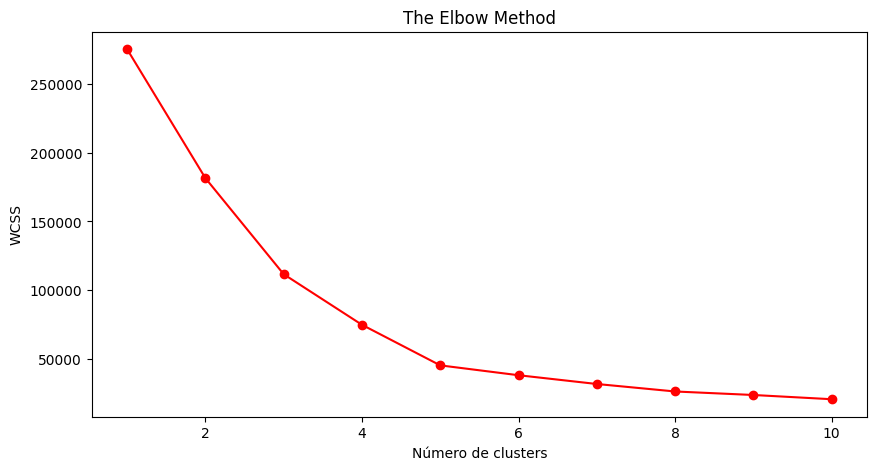

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [45]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5, max_iter = 300)


In [48]:
kmeans = kmeans.fit(df2_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
# Coordenadas dos Centróides
centroides = kmeans.cluster_centers_
centroides

array([[-0.89664028,  1.25740369],
       [ 1.43518521, -0.93366725],
       [ 0.05640706, -0.79159341],
       [ 1.13023763,  0.78042455],
       [-1.34658737, -0.47247215]])

In [50]:
# Classificação dos dados
classificacao = kmeans.labels_
classificacao

array([2, 4, 2, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 2, 4,
       1, 4, 1, 4, 2, 2, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 3, 4,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 4, 3, 3, 0, 1, 2, 3, 0,
       2, 1, 0, 2, 3, 2, 1, 2, 3, 0, 2, 3, 4, 2, 3, 3, 3, 2, 4, 3, 2, 4,
       4, 2, 1, 0, 3, 2, 2, 0, 2, 4, 3, 0, 4, 2, 3, 0, 3, 4, 1, 3, 3, 3,
       3, 4, 2, 0, 4, 4, 1, 2, 2, 2, 0, 2, 2, 0, 2, 4, 3, 0, 3, 0, 3, 0,
       2, 4, 3, 4, 1, 0, 3, 4, 1, 0, 2, 4, 3, 0, 3, 4, 2, 0, 3, 0, 1, 4,
       1, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 2, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [58]:
grafico = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
grafico.show()

In [51]:
import plotly.express as px
import plotly.graph_objects as go

In [52]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [53]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,4
2,2
3,4
4,2
...,...
195,0
196,3
197,0
198,3


In [54]:
df_new = pd.concat([df, agrupamento],axis=1)
df_new

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


## **Atividade Prática com Nota**
* Prazo; 05 de Junho

Dado a base de dados: https://www.kaggle.com/harrywang/wine-dataset-for-clustering 

* Aplicar K-means com a quantidade ideial de cluster "k" para um par de atributos aleatório. Como sugestão, avaliar os atributos com melhor separação no gráfico de matriz scatter

* Refazer os experimentos com todos atributos e utilizando a técnica PCA com dois componentes
